<a href="https://colab.research.google.com/github/Mahonry/Machine-Learning-Course/blob/master/Regresi%C3%B3n_Lineal_y_Log%C3%ADstica_con_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import pandas as pd

# Trabajando con Tensores


_______________________________________________________________________

In [0]:
tensor_a = torch.ones(2,2)

In [0]:
tensor_a

tensor([[1., 1.],
        [1., 1.]])

In [0]:
tensor_b = torch.Tensor(2,2)
tensor_b.uniform_(0,1)

tensor([[0.6917, 0.2526],
        [0.7798, 0.6747]])

In [0]:
tensor_c = torch.rand(2,2)
tensor_c

tensor([[0.8807, 0.8781],
        [0.0193, 0.8237]])

In [0]:
result = tensor_b + tensor_c
result

tensor([[1.5723, 1.1308],
        [0.7991, 1.4984]])

In [0]:
result.shape
reshaped = result.view(4,1)
reshaped

tensor([[1.5723],
        [1.1308],
        [0.7991],
        [1.4984]])

In [0]:
points = torch.tensor([[1.0,2.0],[3.0,4.0]]) # con tensor t -> minuscula, para indicar el contenido del tensor en lugar de numeros aleatorios que se logra con T

In [0]:
points[0][1]

tensor(2.)

In [0]:
points.storage()

 1.0
 2.0
 3.0
 4.0
[torch.FloatStorage of size 4]

In [0]:
points.stride()

(2, 1)

In [0]:
points.t()

tensor([[1., 3.],
        [2., 4.]])

In [0]:
points.t().stride()

(1, 2)

In [0]:
tensor_x = torch.tensor([1,2,3,4])
tensor_x = torch.unsqueeze(tensor_x,1)
tensor_x

tensor([[1],
        [2],
        [3],
        [4]])

In [0]:
numpyArray = np.random.randn(2,2)
from_numpy = torch.from_numpy(numpyArray)
from_numpy

tensor([[-0.9043, -0.4748],
        [ 0.5527,  0.6273]], dtype=torch.float64)

# Representando datos con tensores
_____________________________________________________

In [0]:
print(from_numpy)
print(torch.mean(from_numpy))
print(torch.mean(from_numpy, dim = 0)) # Lo hace a lo largo de las columnas
print(torch.mean(from_numpy, dim = 1)) # Lo hace a lo largo de las filas

tensor([[-0.9043, -0.4748],
        [ 0.5527,  0.6273]], dtype=torch.float64)
tensor(-0.0498, dtype=torch.float64)
tensor([-0.1758,  0.0762], dtype=torch.float64)
tensor([-0.6896,  0.5900], dtype=torch.float64)


In [0]:
torch.std(from_numpy, dim = 1)

tensor([0.3037, 0.0527], dtype=torch.float64)

In [0]:
torch.save(from_numpy, 'tensor.t')

In [0]:
load = torch.load('tensor.t')
load

tensor([[-0.9043, -0.4748],
        [ 0.5527,  0.6273]], dtype=torch.float64)

In [0]:
url = 'https://raw.githubusercontent.com/amanthedorkknight/fifa18-all-player-statistics/master/2019/data.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

In [0]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [0]:
columns_to_keep = ["Overall","Age",'International Reputation', 'Weak Foot','Skill Moves']
subset = df[columns_to_keep].dropna(axis = 0, how = 'any')
columns = subset.columns[1:]
players = torch.tensor(subset.values).float()
players.shape, players.type()

(torch.Size([18159, 5]), 'torch.FloatTensor')

In [0]:
data = players[:,1:]
data, data.shape

(tensor([[31.,  5.,  4.,  4.],
         [33.,  5.,  4.,  5.],
         [26.,  5.,  5.,  5.],
         ...,
         [16.,  1.,  3.,  2.],
         [17.,  1.,  3.,  2.],
         [16.,  1.,  3.,  2.]]), torch.Size([18159, 4]))

In [0]:
target = players[:,0]
target,target.shape

(tensor([94., 94., 92.,  ..., 47., 47., 46.]), torch.Size([18159]))

In [0]:
mean = torch.mean(data, dim = 0)
mean

tensor([25.1225,  1.1132,  2.9473,  2.3613])

In [0]:
std = torch.std(data, dim = 0)
std

tensor([4.6706, 0.3940, 0.6605, 0.7562])

In [0]:
norm = (data-mean)/std
norm

tensor([[ 1.2584,  9.8641,  1.5939,  2.1671],
        [ 1.6866,  9.8641,  1.5939,  3.4896],
        [ 0.1879,  9.8641,  3.1080,  3.4896],
        ...,
        [-1.9532, -0.2873,  0.0798, -0.4778],
        [-1.7391, -0.2873,  0.0798, -0.4778],
        [-1.9532, -0.2873,  0.0798, -0.4778]])

In [0]:
good = data[torch.ge(target,85)]
average = data[torch.ge(target, 70) & torch.lt(target,85)]
notSoGood = data[torch.le(target, 70)]

goodMean = torch.mean(good, dim = 0)
averageMean = torch.mean(average, dim = 0)
notSoGoodMean = torch.mean(notSoGood, dim = 0)

In [0]:
for i, args in enumerate(zip(columns, goodMean, averageMean, notSoGoodMean)):
  print('{:25} {:6.2f} {:6.2f} {:6.2f}'.format(*args))

Age                        28.35  27.17  24.37
International Reputation    3.38   1.31   1.01
Weak Foot                   3.45   3.09   2.89
Skill Moves                 3.04   2.72   2.22


# Regresión Lineal 
_______________________________________________________________________

In [0]:
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

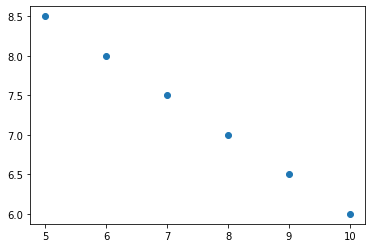

In [157]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5,8,7.5,7.0,6.5,6.0]

plt.scatter(car_prices, units_sold)

In [0]:
prices_array = np.array(car_prices).reshape(-1,1)
units_array = np.array(units_sold).reshape(-1,1)

In [0]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()

In [160]:
prices, prices.shape, units, units.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]), tensor([[8.5000],
         [8.0000],
         [7.5000],
         [7.0000],
         [6.5000],
         [6.0000]]), torch.Size([6, 1]))

In [0]:
model = nn.Linear(1,1)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.015)

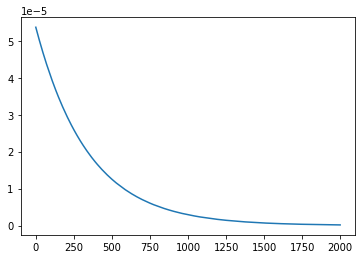

In [164]:
losses = []
iterations = 2000

for i in range(iterations):
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



plt.plot(range(iterations), losses)

In [0]:
x = torch.Tensor([[4.0]])
p = model(x)
p

tensor([[8.9853]], grad_fn=<AddmmBackward>)

# Regresión Logistica
_______________________________________________________________________

In [0]:
n = 100
h = n//2
dim = 2

data = np.random.randn(n, dim)*3

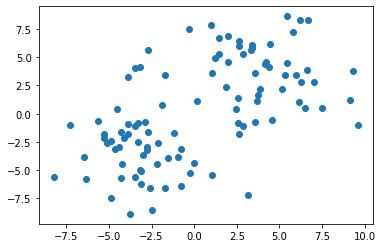

In [145]:
plt.scatter(data[:,0],data[:,1])

In [0]:
data[:h,:] = data[:h,:] - 3*np.ones((h,dim))
data[h:,:] = data[h:,:] + 3*np.ones((h,dim))

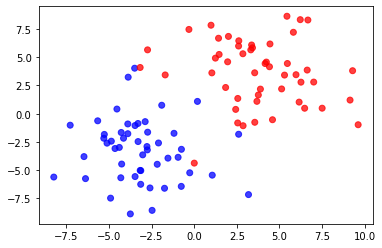

In [151]:
colors = ["blue","red"]
color = np.array([colors[0]]*h+[colors[1]]*h).reshape(n)
plt.scatter(data[:,0],data[:,1], c = color, alpha = 0.75)

In [0]:
target = np.array([0]*h+[1]*h).reshape(n,1)

In [168]:
x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()
x.shape,y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.1459, grad_fn=<BinaryCrossEntropyBackward>)

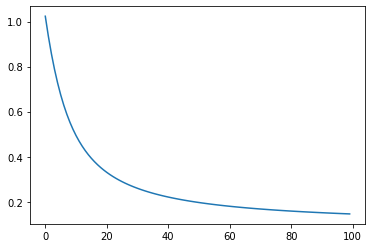

In [170]:
model = nn.Sequential(nn.Linear(2,1), nn.Sigmoid())
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

losses = []
iterations = 100

for i in range(iterations):
  result = model(x)

  loss = loss_function(result, y)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(iterations), losses)
loss

In [190]:
newpoint = torch.Tensor([[0,0]])
prediction = model(newpoint).data[0][0] >0.5
print(colors[prediction])

red


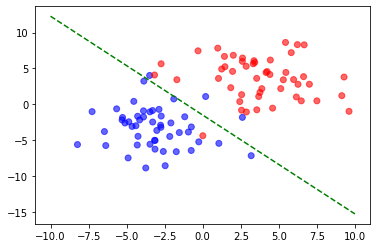

In [200]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0],data[:,1], c = color, alpha = 0.6)

x_axis = np.linspace(-10,10,n)
y_axis = -(w1[0] +x_axis*w0[0][0])/w0[0][1] #Desicion Boundary
plt.plot(x_axis,y_axis,'g--')

In [199]:
w0, w1

(array([[0.49808198, 0.36162934]], dtype=float32),
 array([0.54235756], dtype=float32))